# Modelos de Séries Temporais por Loja
Exemplo de abordagem individual para previsão de vendas por loja usando Prophet e ARIMA.

In [1]:
# Instalação das bibliotecas necessárias
!pip install prophet statsmodels pandas matplotlib

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/14.4 MB ? eta -:--:--Downloading prophet-1.1.7-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 60.6 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/10.5 MB ? eta -:--:--Downloading statsmodels-0.14.5-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (10.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.2 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.w

## 1. Carregando os dados de uma loja específica
Selecione uma loja e prepare os dados para séries temporais.

In [5]:
import pandas as pd
# Carregar dados de vendas
df = pd.read_csv('../data/train.csv', low_memory=False)
# Filtrar para uma loja específica
store_id = 1
df_store = df[df['Store'] == store_id][['Date', 'Sales']].copy()
df_store['Date'] = pd.to_datetime(df_store['Date'])
df_store = df_store.sort_values('Date')

## 2. Previsão com Prophet
Prophet é uma biblioteca do Facebook para séries temporais.

15:37:04 - cmdstanpy - INFO - Chain [1] start processing
15:37:04 - cmdstanpy - INFO - Chain [1] done processing
15:37:04 - cmdstanpy - INFO - Chain [1] done processing


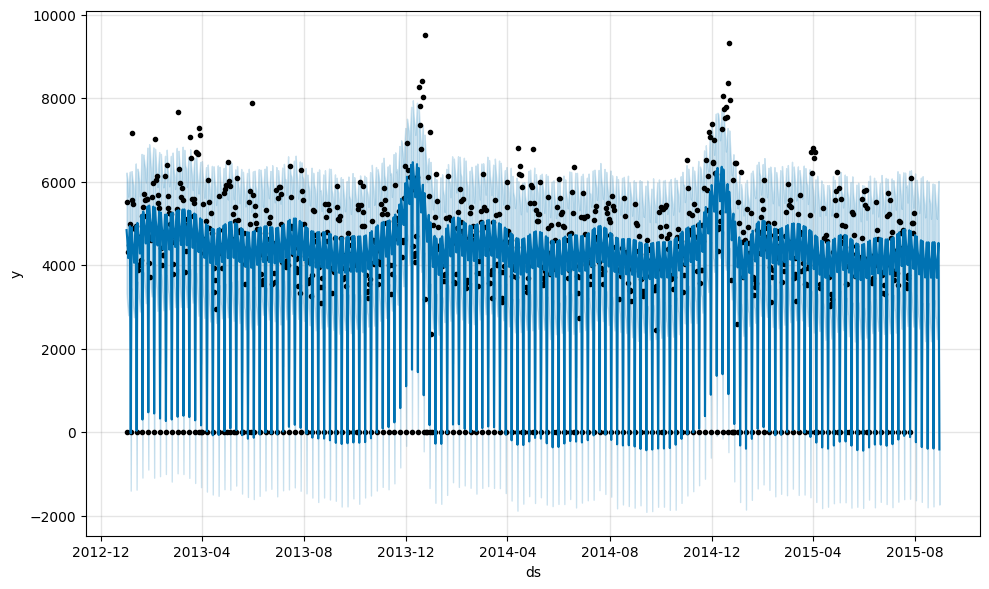

In [6]:
from prophet import Prophet
# Preparar dados para Prophet
df_prophet = df_store.rename(columns={'Date': 'ds', 'Sales': 'y'})
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(df_prophet)
# Prever próximos 30 dias
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
# Visualizar resultado
model.plot(forecast);

## 3. Previsão com ARIMA
ARIMA é um modelo clássico para séries temporais.

/home/ezequielpf/Documentos/Projetos_Data_Science/rossmann_sales_prediction/venv_rossman/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ezequielpf/Documentos/Projetos_Data_Science/rossmann_sales_prediction/venv_rossman/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ezequielpf/Documentos/Projetos_Data_Science/rossmann_sales_prediction/venv_rossman/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ezequielpf/Documentos/Projetos_Data_Science/rossmann_sales_prediction/venv_rossman/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966:

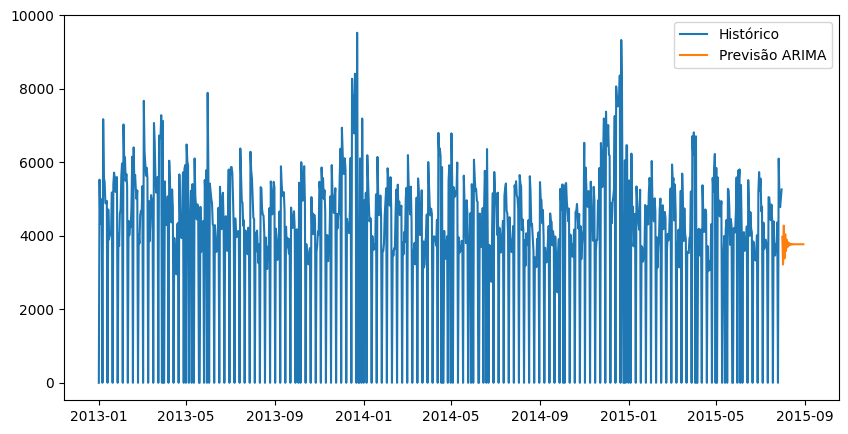

In [7]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
# Ajustar modelo ARIMA
series = df_store.set_index('Date')['Sales']
model_arima = ARIMA(series, order=(2,1,2))
model_fit = model_arima.fit()
# Prever próximos 30 dias
forecast_arima = model_fit.forecast(steps=30)
plt.figure(figsize=(10,5))
plt.plot(series, label='Histórico')
plt.plot(pd.date_range(series.index[-1], periods=31, freq='D')[1:], forecast_arima, label='Previsão ARIMA')
plt.legend()
plt.show()

## 4. Avaliação e comparação
Avalie o desempenho dos modelos usando métricas como RMSE, MAPE, etc. Compare com o modelo global.

## 5. Previsão com modelo baseado em árvores (XGBoost)
Modelos baseados em árvores, como XGBoost, podem capturar padrões não-lineares e interações entre variáveis.

In [9]:
# Previsão de vendas com XGBoost para uma loja específica
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Engenharia de features temporais
df_store['day'] = df_store['Date'].dt.day
df_store['month'] = df_store['Date'].dt.month
df_store['year'] = df_store['Date'].dt.year
df_store['dayofweek'] = df_store['Date'].dt.dayofweek

# Features e target
features = ['day', 'month', 'year', 'dayofweek']
X = df_store[features]
y = df_store['Sales']

# Separar treino e teste (últimos 30 dias para teste)
X_train, X_test = X.iloc[:-30], X.iloc[-30:]
y_train, y_test = y.iloc[:-30], y.iloc[-30:]

# Treinar modelo XGBoost
model_xgb = XGBRegressor(n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)

# Prever
y_pred_xgb = model_xgb.predict(X_test)

# Avaliar
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f'XGBoost - RMSE: {rmse_xgb:.2f} | MAPE: {mape_xgb:.2%}')

XGBoost - RMSE: 949.31 | MAPE: 12453828905402368000.00%


In [11]:
# Pipeline completo: XGBoost com dados de vendas e características da loja
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Carregar dados
df_train = pd.read_csv('../data/train.csv', low_memory=False)
df_store = pd.read_csv('../data/store.csv', low_memory=False)

# Juntar dados de vendas com características da loja
df = pd.merge(df_train, df_store, how='left', on='Store')

# Engenharia de features temporais
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayofweek'] = df['Date'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)

# Exemplo de tratamento de variáveis categóricas
df = pd.get_dummies(df, columns=['StoreType', 'Assortment'], drop_first=True)

# Features e target
features = ['day', 'month', 'year', 'dayofweek', 'is_weekend', 'CompetitionDistance', 'Promo', 'Promo2', 'Open'] + [col for col in df.columns if 'StoreType_' in col or 'Assortment_' in col]
X = df[features].fillna(0)
y = df['Sales']

# Separar treino e teste (últimas 6 semanas para teste, como no desafio original)
df = df.sort_values(['Store','Date'])
test_mask = df['Date'] >= (df['Date'].max() - pd.Timedelta(weeks=6))
X_train, X_test = X[~test_mask], X[test_mask]
y_train, y_test = y[~test_mask], y[test_mask]

# Treinar modelo XGBoost
model_xgb = XGBRegressor(n_estimators=200, max_depth=8, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)
model_xgb.fit(X_train, y_train)

# Prever
y_pred_xgb = model_xgb.predict(X_test)

# Avaliar
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f'XGBoost (global) - RMSE: {rmse_xgb:.2f} | MAPE: {mape_xgb:.2%}')

/tmp/ipykernel_216916/4087117844.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train, X_test = X[~test_mask], X[test_mask]
/tmp/ipykernel_216916/4087117844.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train, X_test = X[~test_mask], X[test_mask]


XGBoost (global) - RMSE: 1583.76 | MAPE: 11227092615377715200.00%


In [8]:
# Avaliação dos modelos Prophet e ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Separar últimos 30 dias para teste
test_size = 30
df_test = df_store.iloc[-test_size:]
y_true = df_test['Sales'].values

# Prophet: pegar previsões para os últimos 30 dias
y_pred_prophet = forecast.tail(test_size)['yhat'].values

# ARIMA: previsões já estão em forecast_arima
y_pred_arima = forecast_arima.values

# RMSE e MAPE Prophet
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred_prophet))
mape_prophet = mean_absolute_percentage_error(y_true, y_pred_prophet)

# RMSE e MAPE ARIMA
rmse_arima = np.sqrt(mean_squared_error(y_true, y_pred_arima))
mape_arima = mean_absolute_percentage_error(y_true, y_pred_arima)

print(f'Prophet - RMSE: {rmse_prophet:.2f} | MAPE: {mape_prophet:.2%}')
print(f'ARIMA   - RMSE: {rmse_arima:.2f} | MAPE: {mape_arima:.2%}')

Prophet - RMSE: 2613.59 | MAPE: 257871663618947579904.00%
ARIMA   - RMSE: 1615.53 | MAPE: 220980866376130723840.00%
